# UNIDAD 2

**Ejercicio 13**

#### Algoritmo de para la lectura y reconocimiento de digitos (Identificación del numero 8)

**Propuesta**:

Antes de realizar la detección de dígitos, exploramos el conjunto de datos de entrada desde el api de **sklearn** con el fin de entender su comportamiento y estrucutura. Luego, importamos herramientas o librerías necesarias para la ejecución y cargamos el dataset de load digits. Ahora bien, nos basamos en un algoritmo basado en plantillas para detectar la presencia de un "8" en la imagen [No es tan eficaz pero con un conjunto de datos que tengan cierta estrucutura y posiciones de los numeros fijos podría arrojar buenos resultados :)]. 

**Procedimiento**:

El algoritmo primero realiza una serie de operaciones de preprocesamiento para binarizar la imagen y luego la compara con una plantilla de "8" predefinida para encontrar similitudes. Cabe mencionar, que esta plantilla fue ajustada con base en los datos de prueba para aumentar la efectividad del algoritmo. Además colocamos un limite de similitud del 75 porciento en base a la plantilla para flexibilizar los errores que pueda contener la imagen o impresiciones. Finalmente, evaluamos el software porpuesto calculando el recall y timpo de ejecución del  mismo.

**Ejercicio 14**

<Figure size 640x480 with 0 Axes>

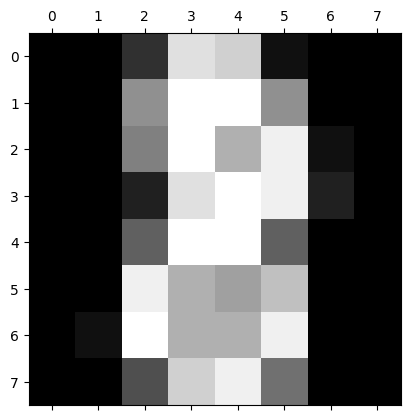

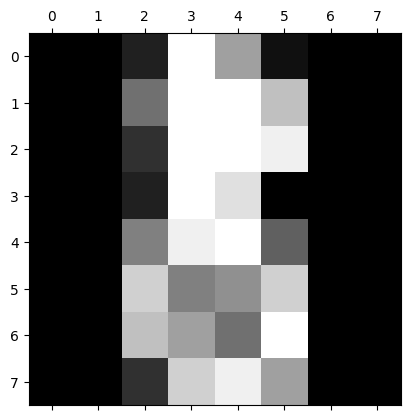

In [4]:
# Importando librerías necesarias para el producto
import time
from sklearn.datasets import load_digits
import numpy as np
import pylab as pl

# Cargamos el dataset digits de sklearn
digits = load_digits()

# Inicio de tiempo para el algoritmo
start_time = time.time()

# Binarizar la imagen utilizando un umbral
def preprocess_image(image):
    # Encontramos el promedio de los elementos en el arreglo de la imagen especifica
    threshold = np.mean(image)
    # Obtenemos el arreglo 8 X 8 binario de la imagen que contiene los valores por encima de la media identificados como 1
    return (image > threshold).astype('uint8')

def compare_images(template,image):
    # Definir limite de similitud para la detención
    threshold = 18 # 75% de similitud entre la codificación binaria [18/24]
    similarity = 0 # Varible acumuladora de similitud entre imagenes [Plantilla vs Imagen Pre-procesada]
    # Recorrido entre matrices 8 X 8 y respectiva validación condicional
    for i in range(8):
        for j in range(8):
            if template[i][j] == 1 and image[i][j] == 1:
                similarity += 1
    # Retorno condicional basado en umbral definido
    if similarity >= threshold:
        return True
    else:
        return False

def detect_eight(image):
    # Preprocesar la imagen
    preprocessed_image = preprocess_image(image)

    # Plantilla predefinida del número 8.
    template = np.array([
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]
    ])

    return compare_images(template, preprocessed_image)
    
# Contadores para calcular los resultados
true_positives = 0
false_negatives = 0

# Iterar sobre todas las imágenes en el dataset digits
for i in range(len(digits.images)):
    image = digits.images[i]
    target = digits.target[i]
    # Utilizar el algoritmo de detección de 8 para la imagen
    detected = detect_eight(image)  
    # Si el número objetivo es 8 "certeza"
    if target == 8:
        if detected:
            true_positives += 1
        else:
            false_negatives += 1
    else:
        if detected:
            false_negatives += 1
        else:
            true_positives += 1



# Fin de tiempo para el algoritmo
end_time = time.time()

# Utilizado para identificar de forma visual las imagenes objetivo (Forma o Estructura) [Debug Porpouses]
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[248]) 
pl.matshow(digits.images[249]) 

**Ejercicios 15 y 16:**

In [5]:
# Calculamos las métricas de tiempo y recall
recall = true_positives / (true_positives + false_negatives)
time = end_time - start_time

print("Resultados:")
print("VP: ", true_positives)
print("FN: ", false_negatives)
print("Recall: ", recall)
print("Tiempo: ", time)

Resultados:
VP:  1179
FN:  618
Recall:  0.656093489148581
Tiempo:  0.1894981861114502
